In [1]:
import numpy as np
from gspread_dataframe import set_with_dataframe
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import gspread
import pandas as pd

gSheetName = 'Copy of MockTest_Project'
tabName = 'Sheet1'

def getSheet(gSheetName,tabName,mode,df_data=0):
   # gc = gspread.service_account(filename='D:/vs code/Resume Project/Test Analiysis/sheet-with-jupyter-77f52dc97efc.json') #home
    gc = gspread.service_account(filename='D:/PW_MIS/Code/sheet-with-jupyter-77f52dc97efc.json') #ofice 
    sh = gc.open(gSheetName)
    workSheet = sh.worksheet(tabName)
    if mode == 'r':
        df = pd.DataFrame(workSheet.get_all_values())
        return df
    elif mode == 'w':
        set_with_dataframe(workSheet,df_data)
        return 'given data is added'
    else:
        return 'given mode is wrong'
        
    


In [3]:
df_test_data = getSheet(gSheetName,tabName,'r')

## DQA and Data Cleaning

In [4]:
df_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,Timestamp,Email Address,Score,Which of the following components is primarily...,What is the purpose of a GPU (Graphics Process...,Which of the following is not a high-level pro...,What is the primary role of an interpreter in ...,Which of the following is a biometric input de...,Which of the following is a non-contact input ...,Which function in MS Excel is used to count th...,...,The transition area between two biological com...,Species are classified by the IUCN RED LIST i...,Which of the following is not a vaccine agains...,Organisms that are composed of Fungi and Algae...,Generally a small quantity of oxygen is essent...,When amount of root pressure high and rate of...,Fingerprint - DO NOT EDIT,Fingerprint - DO NOT EDIT,Fingerprint - DO NOT EDIT,@dropdown
1,6/14/2024 22:49:42,Demo_1@gmail.com,114 / 120,CPU,Rendering graphics and images,Assembly,Translates high-level language into machine code,Fingerprint scanner,Optical Scanner,COUNT,...,Ecotone,9,Nuvaxoid,Lichens,Warburg Effect,Guttation,,,,
2,6/15/2024 4:41:20,Demo_2@gmail.com,14 / 120,Motherboard,,Assembly,Translates high-level language into machine code,Fingerprint scanner,Trackball,COUNT,...,,,,,,,,,,
3,6/15/2024 4:41:29,Demo_3@gmail.com,31 / 120,CPU,Rendering graphics and images,C++,Translates high-level language into machine code,Fingerprint scanner,Joystick,SUM,...,,,,,,,,,,
4,6/15/2024 4:41:39,Demo_4@gmail.com,29 / 120,CPU,Rendering graphics and images,Java,Converts source code into executable files,Fingerprint scanner,Optical Scanner,COUNT,...,Ecology,9,Moderna,weeds,Mitotic Effect,Osmosis,,,,


In [5]:
#droping irrelevant col
df_test_data.drop(columns=[123,124,125,126],inplace=True)
df_test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,Timestamp,Email Address,Score,Which of the following components is primarily...,What is the purpose of a GPU (Graphics Process...,Which of the following is not a high-level pro...,What is the primary role of an interpreter in ...,Which of the following is a biometric input de...,Which of the following is a non-contact input ...,Which function in MS Excel is used to count th...,...,Which of the following VITAMINS is the most e...,Which of the following diseases are caused by ...,Which of the following sources of energy does ...,The natural aging of lakes or other water bodi...,The transition area between two biological com...,Species are classified by the IUCN RED LIST i...,Which of the following is not a vaccine agains...,Organisms that are composed of Fungi and Algae...,Generally a small quantity of oxygen is essent...,When amount of root pressure high and rate of...
1,6/14/2024 22:49:42,Demo_1@gmail.com,114 / 120,CPU,Rendering graphics and images,Assembly,Translates high-level language into machine code,Fingerprint scanner,Optical Scanner,COUNT,...,Folic Acid,B and D,Geothermal energy,Eutrophication,Ecotone,9,Nuvaxoid,Lichens,Warburg Effect,Guttation
2,6/15/2024 4:41:20,Demo_2@gmail.com,14 / 120,Motherboard,,Assembly,Translates high-level language into machine code,Fingerprint scanner,Trackball,COUNT,...,,,,,,,,,,
3,6/15/2024 4:41:29,Demo_3@gmail.com,31 / 120,CPU,Rendering graphics and images,C++,Translates high-level language into machine code,Fingerprint scanner,Joystick,SUM,...,,,,,,,,,,
4,6/15/2024 4:41:39,Demo_4@gmail.com,29 / 120,CPU,Rendering graphics and images,Java,Converts source code into executable files,Fingerprint scanner,Optical Scanner,COUNT,...,Thiamine,B and D,Bio Gas,Acidification,Ecology,9,Moderna,weeds,Mitotic Effect,Osmosis


In [6]:
q_list = [f"Qus {i}" for i in range(1,121) ]
str_col = ["Timestamp" , "Email Address" , "Score"]
new_header = str_col + q_list
df_test_data.columns = new_header

In [7]:
df_test_data = df_test_data.drop(index=0 , axis=0)
df_test_data.reset_index
df_test_data.head()

,Timestamp,Email Address,Score,Qus 1,Qus 2,Qus 3,Qus 4,Qus 5,Qus 6,Qus 7,...,Qus 111,Qus 112,Qus 113,Qus 114,Qus 115,Qus 116,Qus 117,Qus 118,Qus 119,Qus 120
1,6/14/2024 22:49:42,Demo_1@gmail.com,114 / 120,CPU,Rendering graphics and images,Assembly,Translates high-level language into machine code,Fingerprint scanner,Optical Scanner,COUNT,...,Folic Acid,B and D,Geothermal energy,Eutrophication,Ecotone,9,Nuvaxoid,Lichens,Warburg Effect,Guttation
2,6/15/2024 4:41:20,Demo_2@gmail.com,14 / 120,Motherboard,,Assembly,Translates high-level language into machine code,Fingerprint scanner,Trackball,COUNT,...,,,,,,,,,,
3,6/15/2024 4:41:29,Demo_3@gmail.com,31 / 120,CPU,Rendering graphics and images,C++,Translates high-level language into machine code,Fingerprint scanner,Joystick,SUM,...,,,,,,,,,,
4,6/15/2024 4:41:39,Demo_4@gmail.com,29 / 120,CPU,Rendering graphics and images,Java,Converts source code into executable files,Fingerprint scanner,Optical Scanner,COUNT,...,Thiamine,B and D,Bio Gas,Acidification,Ecology,9,Moderna,weeds,Mitotic Effect,Osmosis
5,6/15/2024 4:42:12,Demo_5@gmail.com,23 / 120,RAM,Rendering graphics and images,Assembly,Translates high-level language into machine code,Fingerprint scanner,Optical Scanner,COUNT,...,Folic Acid,B and D,Fossil Fuels,Eutrophication,Ecotone,,Nuvaxoid,,,


We have get the data in same form that is present in gsheet. now we can start DQA and Data Cleaning on this data

In [8]:
#Total Records

print("Total records (rows) in the dataset : {}".format(df_test_data.shape[0]))
print("Total columns (features) in the dataset : {}".format(df_test_data.shape[1]))

Total records (rows) in the dataset : 1782
Total columns (features) in the dataset : 123


In [9]:
df_test_data.head()

,Timestamp,Email Address,Score,Qus 1,Qus 2,Qus 3,Qus 4,Qus 5,Qus 6,Qus 7,...,Qus 111,Qus 112,Qus 113,Qus 114,Qus 115,Qus 116,Qus 117,Qus 118,Qus 119,Qus 120
1,6/14/2024 22:49:42,Demo_1@gmail.com,114 / 120,CPU,Rendering graphics and images,Assembly,Translates high-level language into machine code,Fingerprint scanner,Optical Scanner,COUNT,...,Folic Acid,B and D,Geothermal energy,Eutrophication,Ecotone,9,Nuvaxoid,Lichens,Warburg Effect,Guttation
2,6/15/2024 4:41:20,Demo_2@gmail.com,14 / 120,Motherboard,,Assembly,Translates high-level language into machine code,Fingerprint scanner,Trackball,COUNT,...,,,,,,,,,,
3,6/15/2024 4:41:29,Demo_3@gmail.com,31 / 120,CPU,Rendering graphics and images,C++,Translates high-level language into machine code,Fingerprint scanner,Joystick,SUM,...,,,,,,,,,,
4,6/15/2024 4:41:39,Demo_4@gmail.com,29 / 120,CPU,Rendering graphics and images,Java,Converts source code into executable files,Fingerprint scanner,Optical Scanner,COUNT,...,Thiamine,B and D,Bio Gas,Acidification,Ecology,9,Moderna,weeds,Mitotic Effect,Osmosis
5,6/15/2024 4:42:12,Demo_5@gmail.com,23 / 120,RAM,Rendering graphics and images,Assembly,Translates high-level language into machine code,Fingerprint scanner,Optical Scanner,COUNT,...,Folic Acid,B and D,Fossil Fuels,Eutrophication,Ecotone,,Nuvaxoid,,,


In [10]:
#Ans  Key



df_ans = df_test_data.iloc[:1]

In [11]:
df_ans

,Timestamp,Email Address,Score,Qus 1,Qus 2,Qus 3,Qus 4,Qus 5,Qus 6,Qus 7,...,Qus 111,Qus 112,Qus 113,Qus 114,Qus 115,Qus 116,Qus 117,Qus 118,Qus 119,Qus 120
1,6/14/2024 22:49:42,Demo_1@gmail.com,114 / 120,CPU,Rendering graphics and images,Assembly,Translates high-level language into machine code,Fingerprint scanner,Optical Scanner,COUNT,...,Folic Acid,B and D,Geothermal energy,Eutrophication,Ecotone,9,Nuvaxoid,Lichens,Warburg Effect,Guttation


In [12]:
len(df_test_data.columns)

123

converting df_test_data into true/false it's helps us to calculate with ease

In [13]:
def com(df_1, df_2):
    #new_df = pd.DataFrame() 
    i = 0 
    for col in df_1.columns: 
        df_1[col] = df_1[col].astype(str).map(lambda x, i=i, Val=df_2.iloc[0,i]: ' ' if x ==""  else 'True' if x==str(Val) else 'False')
        #df_test_data[col] = df_test_data[col].astype(str).map(df_ans.iloc[0,i])
        i += 1  
    return df_1

In [14]:
tamp = df_test_data[['Timestamp','Email Address','Score']]

In [15]:
df_TF =  com(df_test_data,df_ans)


In [16]:
df_TF.drop(df_TF.columns[[0,1,2]], axis=1, inplace=True)

In [17]:
frames = [tamp, df_TF]
 
df_final_TF = pd.concat(frames , axis=1)



In [18]:
df_final_TF.head()

,Timestamp,Email Address,Score,Qus 1,Qus 2,Qus 3,Qus 4,Qus 5,Qus 6,Qus 7,...,Qus 111,Qus 112,Qus 113,Qus 114,Qus 115,Qus 116,Qus 117,Qus 118,Qus 119,Qus 120
1,6/14/2024 22:49:42,Demo_1@gmail.com,114 / 120,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,6/15/2024 4:41:20,Demo_2@gmail.com,14 / 120,False,,True,True,True,False,True,...,,,,,,,,,,
3,6/15/2024 4:41:29,Demo_3@gmail.com,31 / 120,True,True,False,True,True,False,False,...,,,,,,,,,,
4,6/15/2024 4:41:39,Demo_4@gmail.com,29 / 120,True,True,False,False,True,True,True,...,False,True,False,False,False,True,False,False,False,False
5,6/15/2024 4:42:12,Demo_5@gmail.com,23 / 120,False,True,True,True,True,True,True,...,True,True,False,True,True,,True,,,


we have gotten final df, now starts adding features like attempted, not attempted and score in every subject

In [19]:
def row_wise_cal(df,want_to_sch,col_name,a,b):
    for x in range(1,len(df)): 
        #print(x)
        t = df.iloc[x-1,a:b].values
        #print(t)
        df.loc[x ,col_name] = np.count_nonzero(t == want_to_sch)
        #print(df[col_name][x])
    return df 


In [20]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch=' ' , col_name='Unattempted',a=3,b=123)
#row_wise_cal(df_final_TF , want_to_sch='True' , col_name='attempted')


In [21]:
df_final_TF['Attempted'] = df_final_TF['Unattempted'].apply(lambda x : 120 - x)

In [22]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='Total_score',a=3,b=123)

In [23]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='correct',a=3,b=123)

In [24]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='Computer',a=3,b=13)

In [25]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='Reasoning',a=13,b=23)

In [26]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='Specialization',a=23,b=83)

In [27]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='GK',a=83,b=103)

In [28]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='English',a=103,b=113)

In [29]:
df_final_TF = row_wise_cal(df_final_TF , want_to_sch='True' , col_name='science',a=113,b=123)

In [30]:
df_final_TF.head()

,Timestamp,Email Address,Score,Qus 1,Qus 2,Qus 3,Qus 4,Qus 5,Qus 6,Qus 7,...,Unattempted,Attempted,Total_score,correct,Computer,Reasoning,Specialization,GK,English,science
1,6/14/2024 22:49:42,Demo_1@gmail.com,114 / 120,True,True,True,True,True,True,True,...,1.0,119.0,119.0,119.0,10.0,10.0,59.0,20.0,10.0,10.0
2,6/15/2024 4:41:20,Demo_2@gmail.com,14 / 120,False,,True,True,True,False,True,...,89.0,31.0,13.0,13.0,4.0,1.0,2.0,6.0,0.0,0.0
3,6/15/2024 4:41:29,Demo_3@gmail.com,31 / 120,True,True,False,True,True,False,False,...,82.0,38.0,30.0,30.0,7.0,1.0,0.0,15.0,7.0,0.0
4,6/15/2024 4:41:39,Demo_4@gmail.com,29 / 120,True,True,False,False,True,True,True,...,46.0,74.0,29.0,29.0,7.0,0.0,6.0,9.0,5.0,2.0
5,6/15/2024 4:42:12,Demo_5@gmail.com,23 / 120,False,True,True,True,True,True,True,...,93.0,27.0,22.0,22.0,8.0,0.0,0.0,9.0,0.0,5.0


we have successfully added feature that gives detailed information about an individual's test. now loading this into same sheet and the share result with everyone via mail 

In [31]:
tabName1 = 'result'
getSheet(gSheetName,tabName1,'w',df_final_TF)

'given data is added'

## EDA

In [32]:
#Top 5 Hardest qus. with it's unattempted rate

def hard_qus(df, wts):
    hard_q = pd.DataFrame()
    qus_col = []
    qus_data = []
    for col in df.columns[3:123]:
        t_data=df[col].values
        qus_data.append(np.count_nonzero(t_data == wts))
        qus_col.append(col)
    
    df1 = pd.DataFrame({
                        'qus' : qus_col,
                        'data' :qus_data})
    return df1
        
    


In [33]:

unat = hard_qus(df_final_TF,wts=' ')

hard_df = unat.sort_values(by=['data'], ascending=False).head(5)




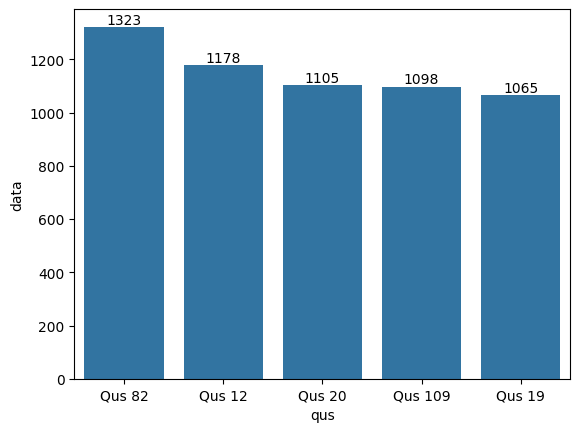

In [34]:
ax = sns.barplot(x = 'qus', y = 'data' ,data = hard_df)
for bar in ax.containers:
    ax.bar_label(bar)

by seeing above chart we can write Qus 82 is the hardest qusetion with 1323 unattempt 

In [35]:
#most easist qus
esy = hard_qus(df_final_TF , wts='True')

easy_df = esy.sort_values(by=['data'], ascending=False).head(5)


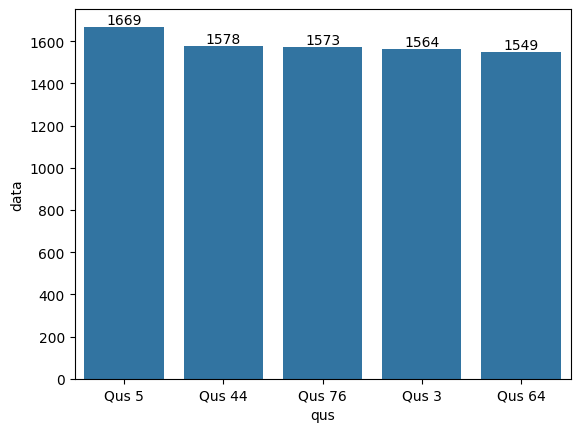

In [36]:
ax = sns.barplot(x = 'qus', y = 'data' ,data = easy_df)
for bar in ax.containers:
    ax.bar_label(bar)

by seeing above chart we can write Qus 5 is the easist qusetion with 1669 attempt

In [37]:
# most tricky qus

tricky = hard_qus(df_final_TF , wts='False')

tricky_df = tricky.sort_values(by=['data'], ascending=False).head(5)


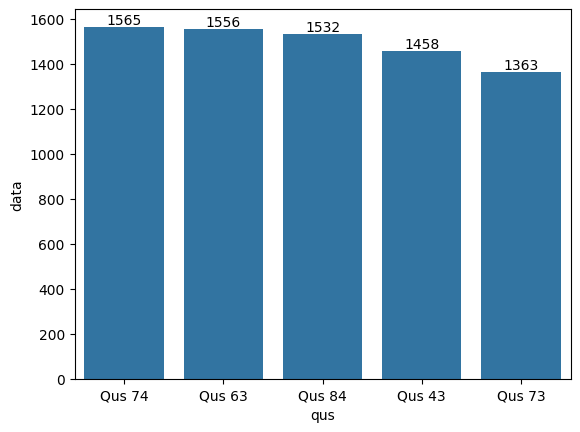

In [38]:
ax = sns.barplot(x = 'qus', y = 'data' ,data = tricky_df)
for bar in ax.containers:
    ax.bar_label(bar)

qus 74 is the most trickyest qus

In [39]:
#top 5 scorer

temp_df = df_final_TF.sort_values(by=['Total_score'], ascending=False).head(5)
temp_df[['Email Address','Total_score']]

,Email Address,Total_score
1,Demo_1@gmail.com,119.0
1151,Demo_1151@gmail.com,109.0
724,Demo_724@gmail.com,102.0
1571,Demo_1571@gmail.com,100.0
710,Demo_710@gmail.com,99.0


Topper is Junaidraja467@gmail.com	with 119 marks